# Tugas 2 – Praproses Data

## 1. Import Library

Pada tahap ini dilakukan pemanggilan library yang digunakan untuk pengolahan data, visualisasi, dan praproses.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 2. Load Dataset

Dataset Agri-food CO₂ Emission dimuat ke dalam DataFrame untuk dilakukan analisis lebih lanjut.

In [2]:
df = pd.read_csv("../datasets/Agrofood_co2_emission.csv")
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


## 3. Identifikasi Tipe Data

Tahap ini bertujuan untuk memisahkan atribut numerik dan kategorikal yang akan diproses dengan metode yang berbeda.

In [3]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

numerical_cols, categorical_cols


(Index(['Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
        'Rice Cultivation', 'Drained organic soils (CO2)',
        'Pesticides Manufacturing', 'Food Transport', 'Forestland',
        'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
        'On-farm Electricity Use', 'Food Packaging',
        'Agrifood Systems Waste Disposal', 'Food Processing',
        'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
        'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
        'Fires in humid tropical forests', 'On-farm energy use',
        'Rural population', 'Urban population', 'Total Population - Male',
        'Total Population - Female', 'total_emission',
        'Average Temperature °C'],
       dtype='object'),
 Index(['Area'], dtype='object'))

## 4. Eksplorasi Data Awal

Eksplorasi awal dilakukan untuk memahami struktur data, tipe data, serta ringkasan statistik dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [5]:
df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


## 5. Analisis Missing Value

Pada tahap ini dilakukan identifikasi jumlah dan persentase missing value pada setiap atribut.

In [6]:
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

pd.DataFrame({
    "Missing Count": missing_count,
    "Missing Percentage (%)": missing_percent
})

,Missing Count,Missing Percentage (%)
Area,0,0.000000
Year,0,0.000000
Savanna fires,31,0.445083
Forest fires,93,1.335248
Crop Residues,1389,19.942570
Rice Cultivation,0,0.000000
Drained organic soils (CO2),0,0.000000
Pesticides Manufacturing,0,0.000000
Food Transport,0,0.000000
Forestland,493,7.078248


## 6. Penanganan Missing Value

Missing value pada atribut numerik ditangani menggunakan nilai median untuk mengurangi pengaruh outlier.

In [7]:
df[numerical_cols] = df[numerical_cols].fillna(
    df[numerical_cols].median()
)

## 7. Visualisasi Distribusi Data Asli

Visualisasi histogram digunakan untuk memahami sebaran data numerik sebelum dilakukan praproses lebih lanjut.

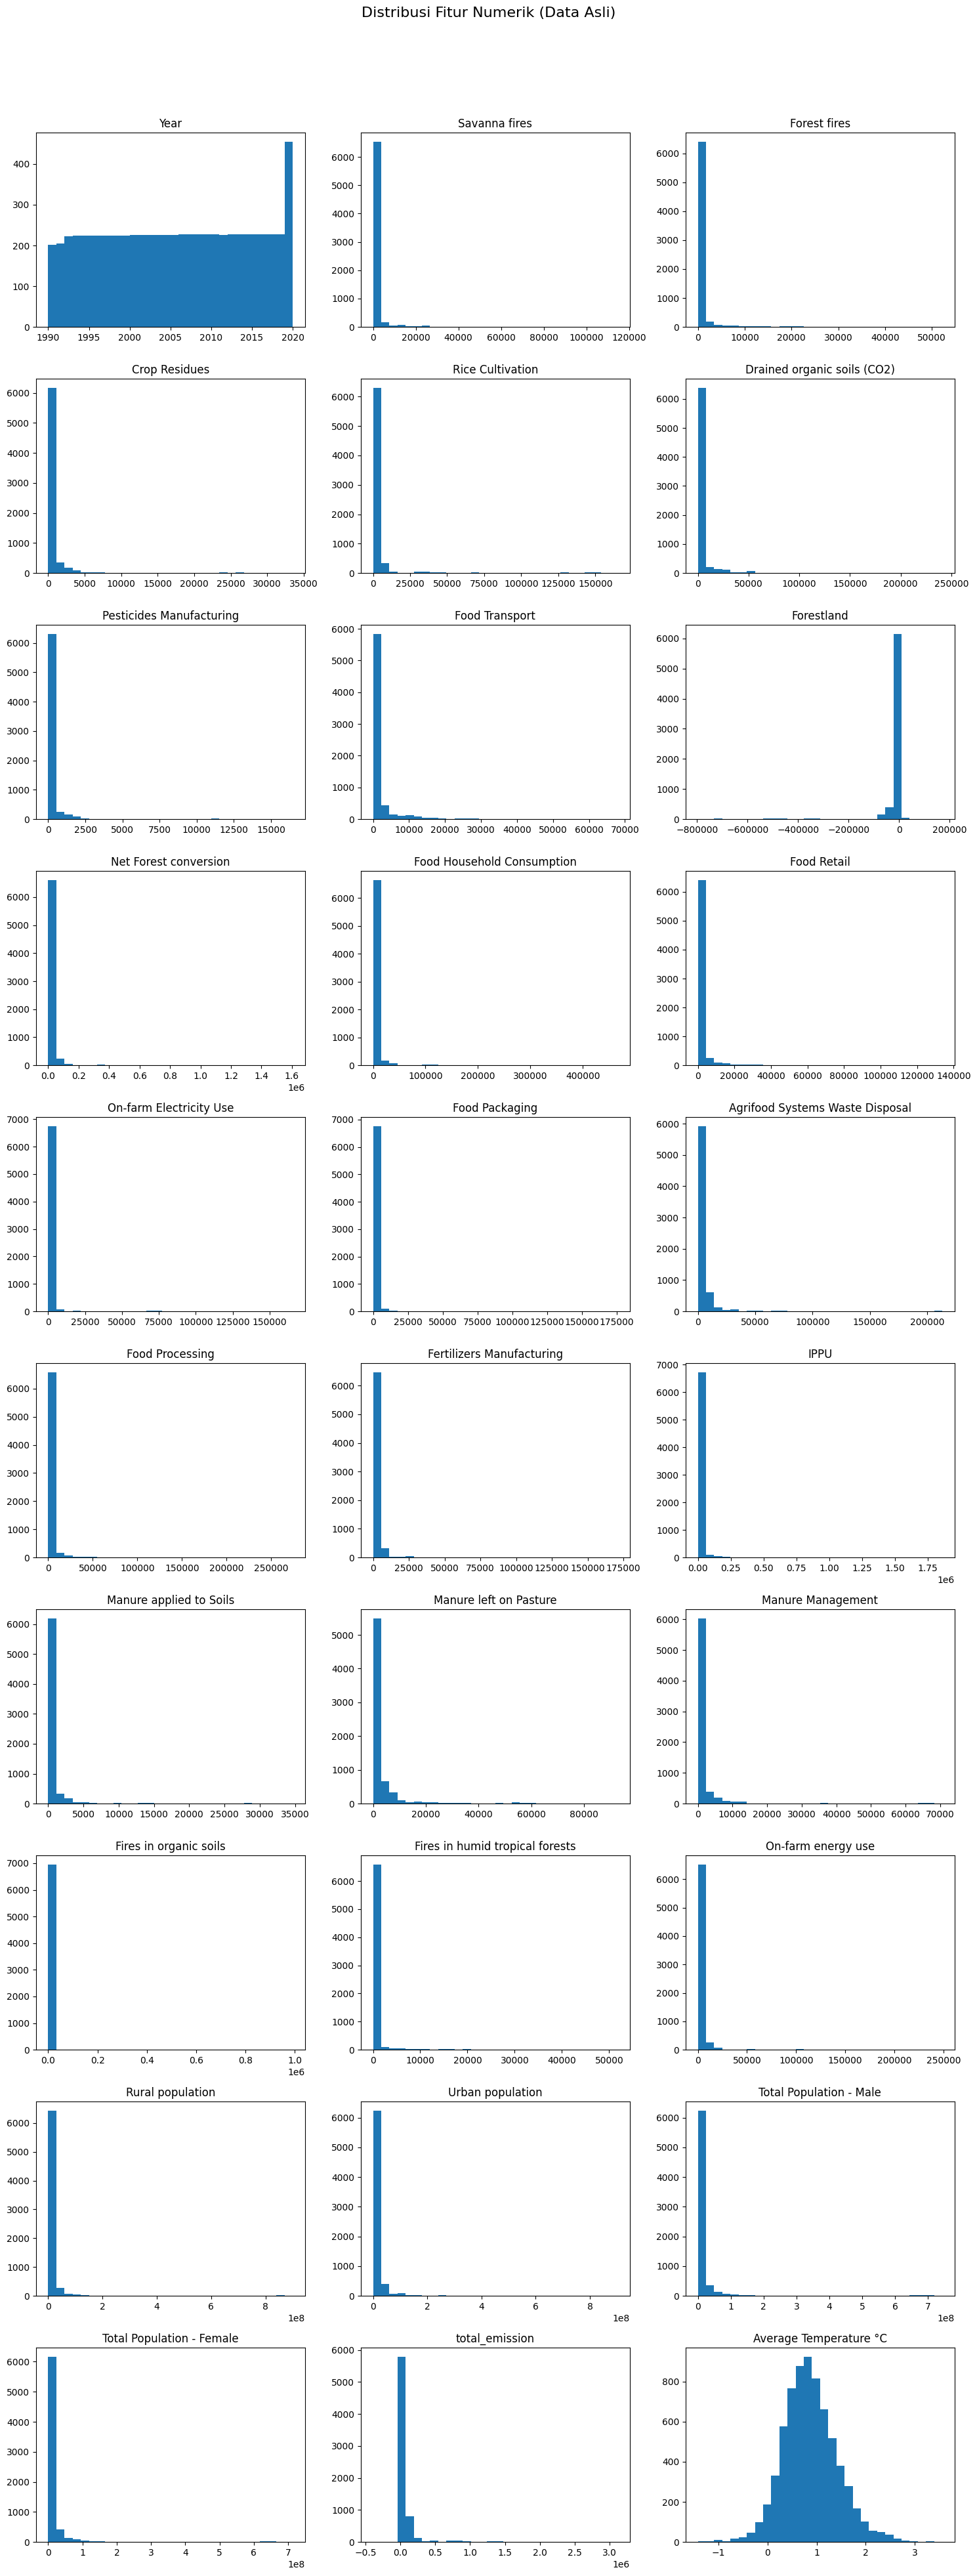

In [8]:
import math

n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col], bins=30)
    plt.title(col)

plt.suptitle("Distribusi Fitur Numerik (Data Asli)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 8. Deteksi dan Penanganan Outlier

Outlier dideteksi dan ditangani menggunakan metode Interquartile Range (IQR).

In [9]:
df_outlier = df.copy()

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_outlier[col] = np.clip(df[col], lower, upper)

## 9. Visualisasi Outlier (Sebelum dan Sesudah)

Boxplot digunakan untuk membandingkan kondisi data sebelum dan sesudah penanganan outlier.

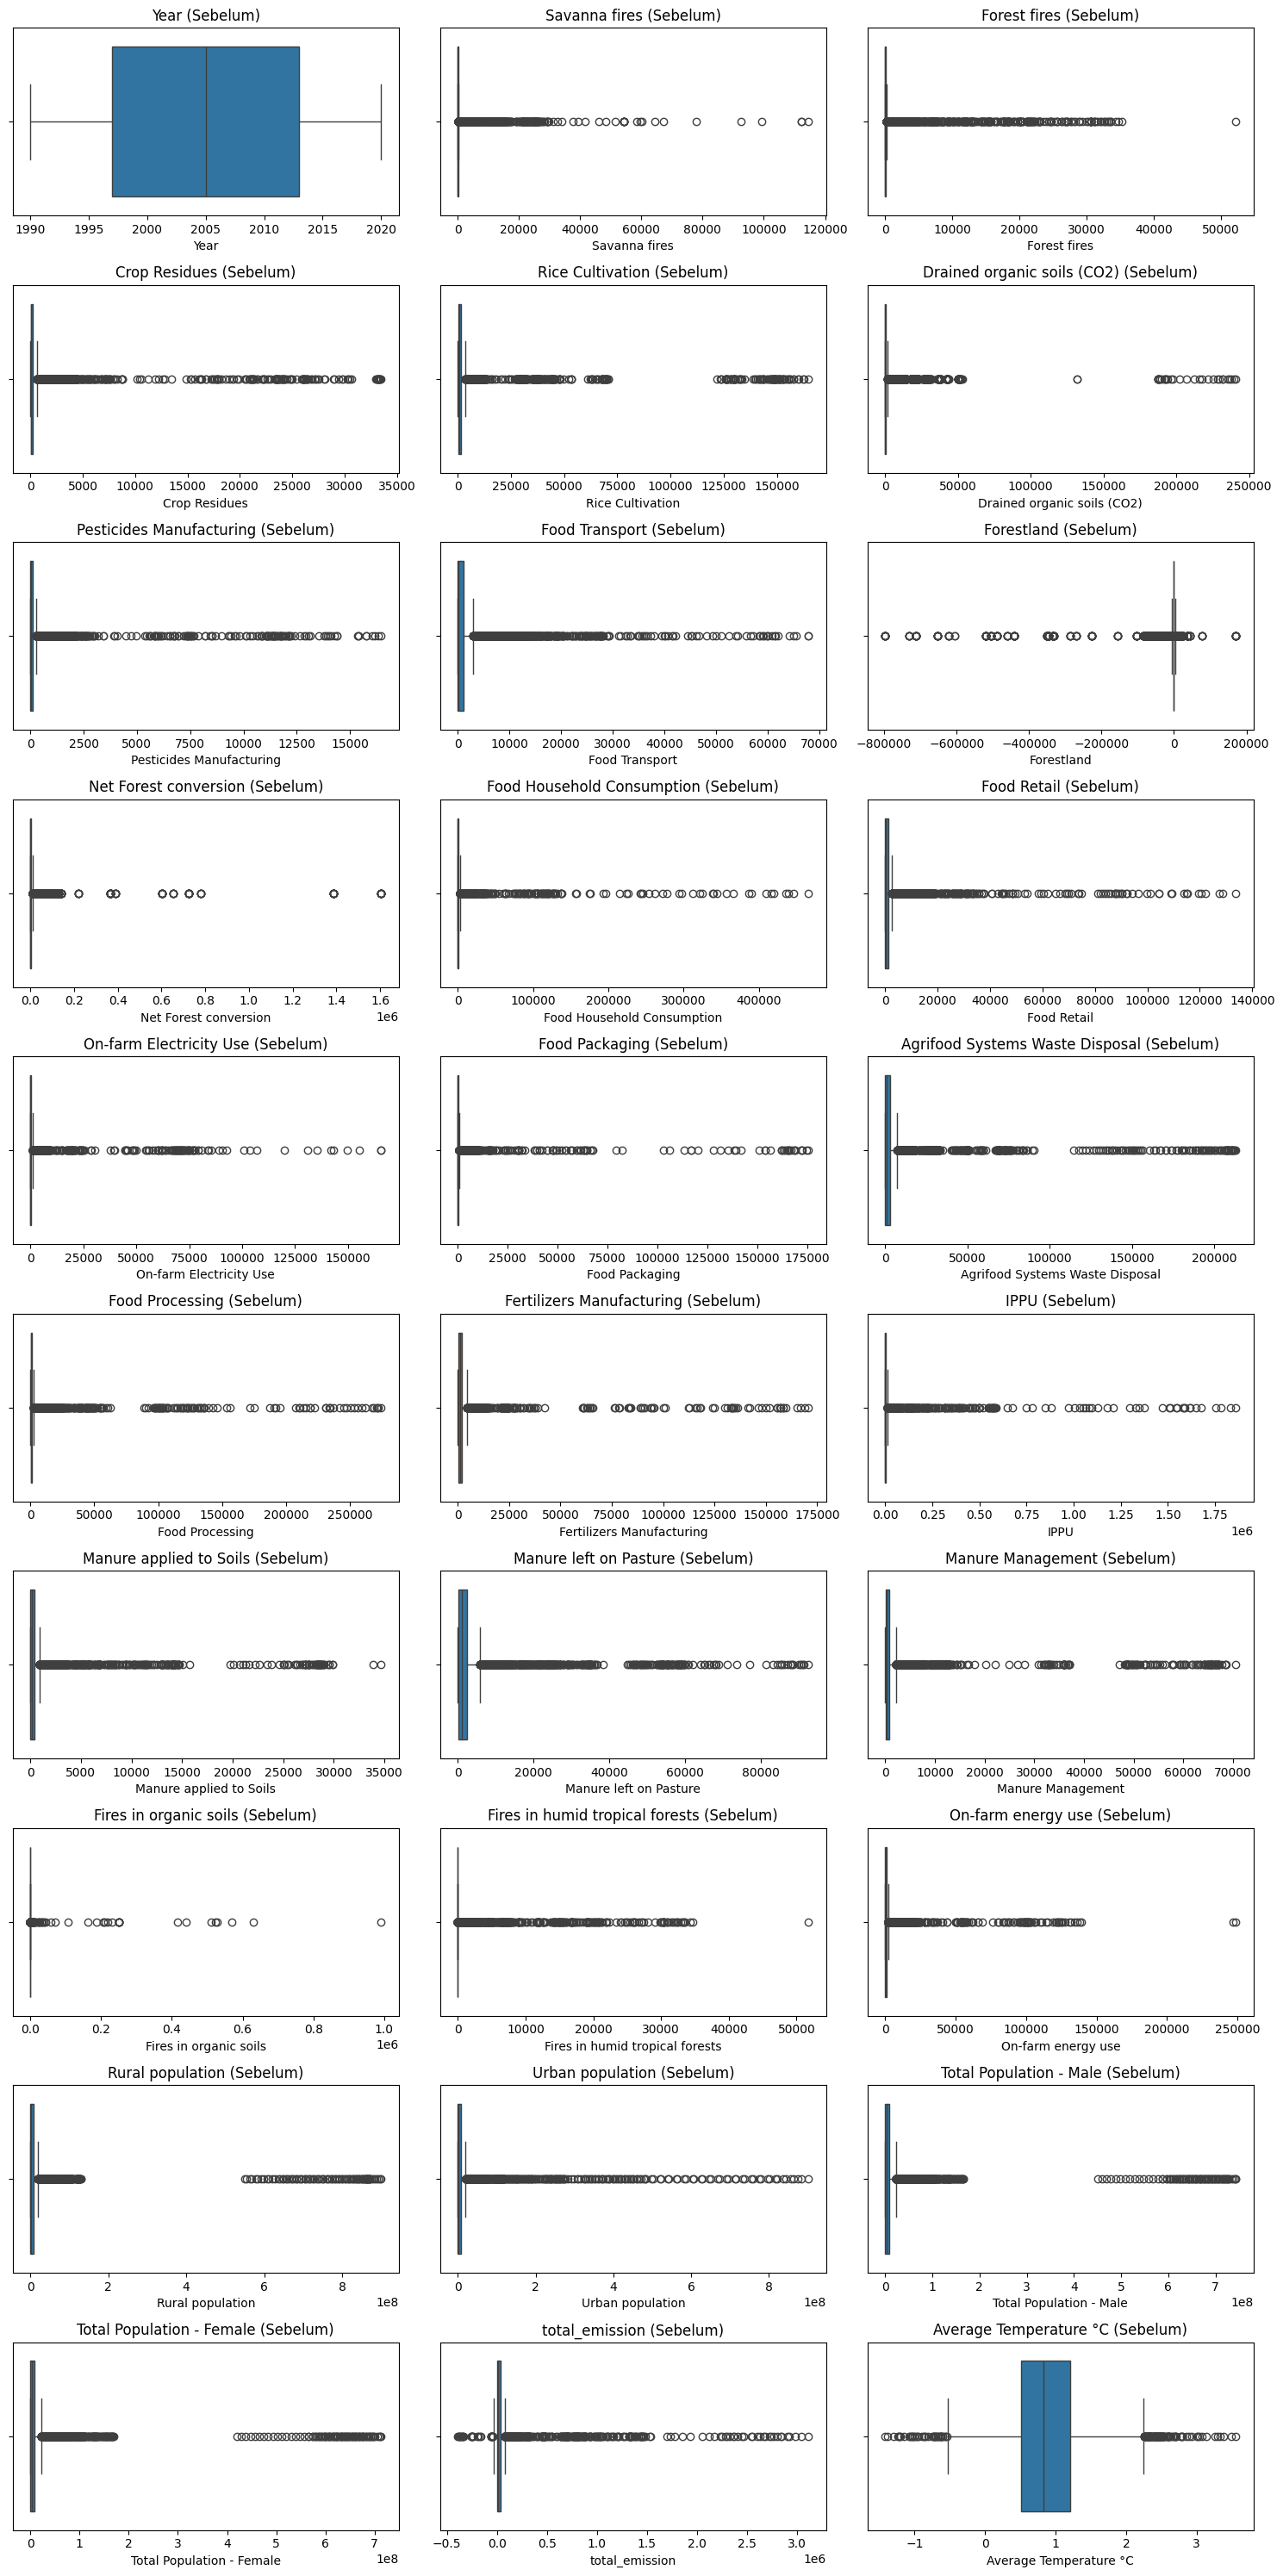

In [10]:
plt.figure(figsize=(n_cols * 5, n_rows * 3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f"{col} (Sebelum)")

plt.tight_layout()
plt.show()

### 9.1 Sesudah di tangani outlier nya

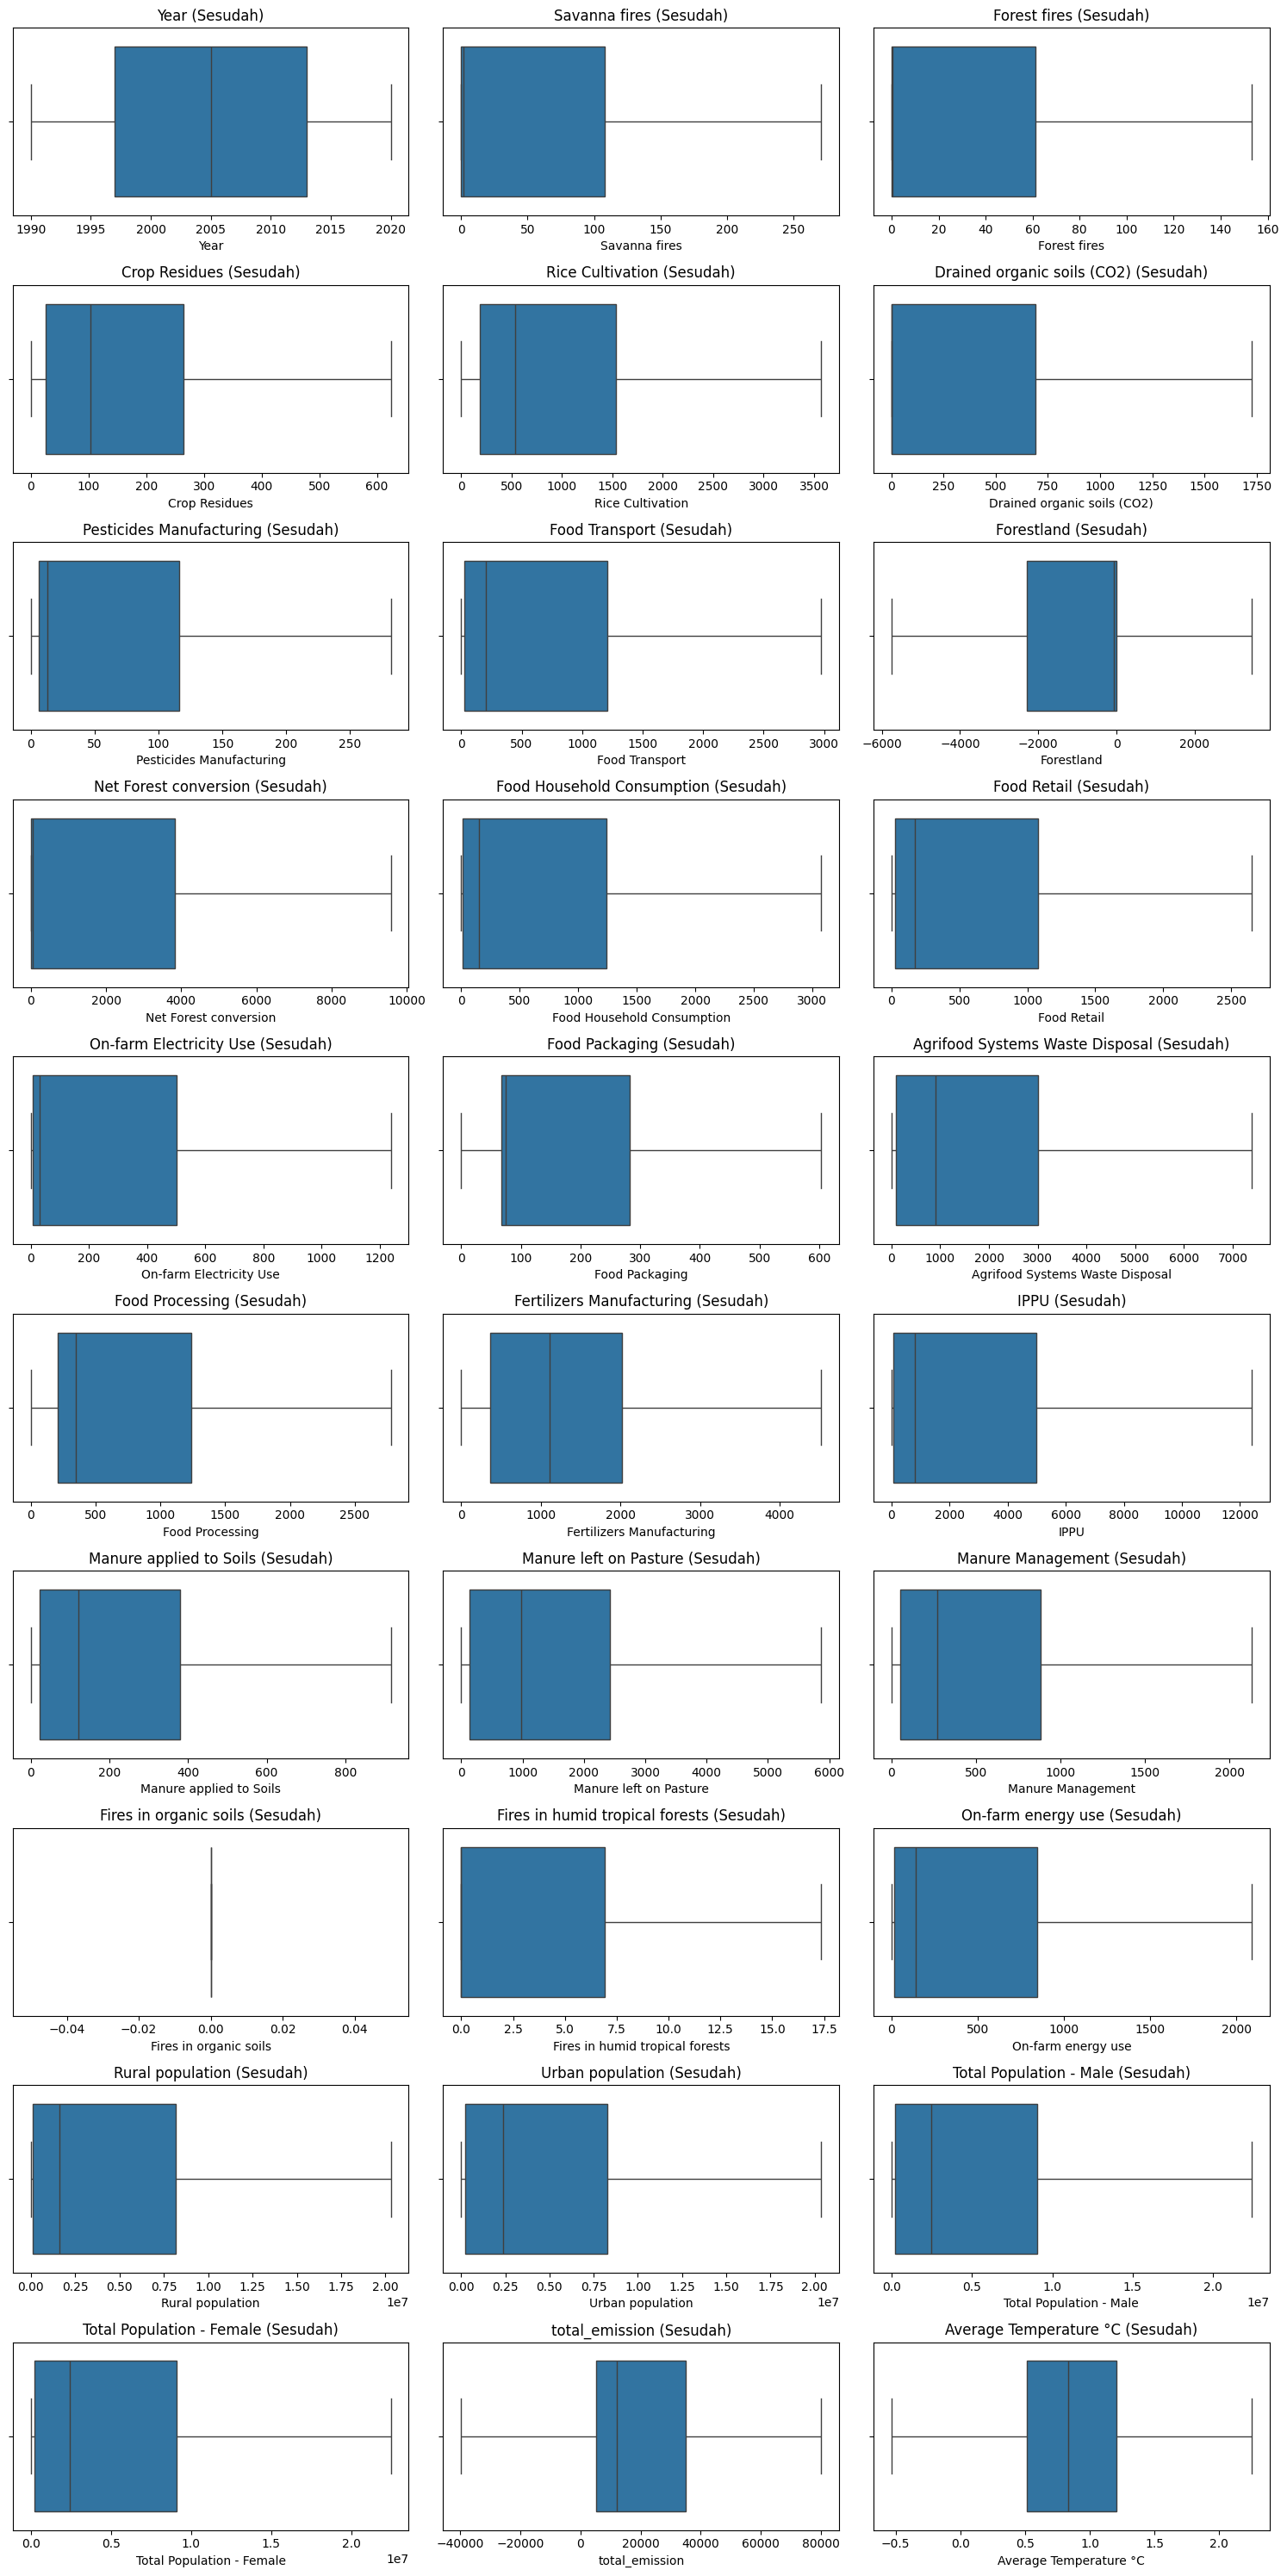

In [11]:
plt.figure(figsize=(n_cols * 5, n_rows * 3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df_outlier[col])
    plt.title(f"{col} (Sesudah)")

plt.tight_layout()
plt.show()

## 10. Feature Scaling (Standardization)

Feature scaling dilakukan menggunakan StandardScaler agar fitur memiliki rata-rata 0 dan standar deviasi 1.

In [12]:
scaler = StandardScaler()

df_scaled = df_outlier.copy()
df_scaled[numerical_cols] = scaler.fit_transform(
    df_outlier[numerical_cols]
)

## 11. Normalization (Min–Max Scaling)

Normalisasi dilakukan untuk mengubah rentang nilai fitur menjadi antara 0 dan 1

In [13]:
minmax = MinMaxScaler()

df_normalized = df_outlier.copy()
df_normalized[numerical_cols] = minmax.fit_transform(
    df_outlier[numerical_cols]
)

## 12. Feature Encoding

Atribut kategorikal diubah menjadi numerik menggunakan metode one-hot encoding.

In [14]:
df_encoded = pd.get_dummies(
    df_normalized,
    columns=categorical_cols,
    drop_first=True
)

df_encoded.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Area_Uzbekistan,Area_Vanuatu,Area_Venezuela (Bolivarian Republic of),Area_Viet Nam,Area_Wallis and Futuna Islands,Area_Western Sahara,Area_Yemen,Area_Yugoslav SFR,Area_Zambia,Area_Zimbabwe
0,0.000000,0.05435,0.000364,0.329629,0.192173,0.0,0.041898,0.021211,0.365278,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.033333,0.05435,0.000364,0.335864,0.189976,0.0,0.041560,0.020572,0.365278,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.066667,0.05435,0.000364,0.315082,0.192173,0.0,0.041560,0.017918,0.365278,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.100000,0.05435,0.000364,0.370045,0.192173,0.0,0.041560,0.018269,0.365278,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.133333,0.05435,0.000364,0.388052,0.197663,0.0,0.041560,0.018144,0.365278,0.0,...,False,False,False,False,False,False,False,False,False,False


## 13. Analisis Korelasi

Analisis korelasi dilakukan untuk mengetahui hubungan antar fitur numerik, khususnya terhadap total emisi.

In [15]:
corr_matrix = df_encoded.corr()

corr_target = (
    corr_matrix["total_emission"]
    .drop("total_emission")
    .sort_values(ascending=False)
)

corr_target.head(10)

Total Population - Male            0.797727
Total Population - Female          0.795939
Urban population                   0.794162
Agrifood Systems Waste Disposal    0.757461
Rural population                   0.690955
Manure Management                  0.681374
Manure applied to Soils            0.677397
Crop Residues                      0.673586
Food Transport                     0.665883
Food Household Consumption         0.634499
Name: total_emission, dtype: float64

## 14. Visualisasi Korelasi

Heatmap digunakan untuk menampilkan fitur dengan korelasi tertinggi terhadap total emisi.

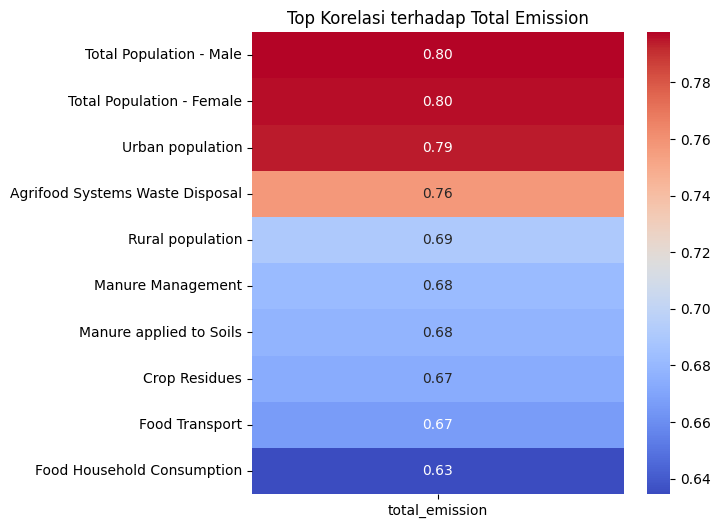

In [16]:
plt.figure(figsize=(6,6))
sns.heatmap(
    corr_target.head(10).to_frame(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Top Korelasi terhadap Total Emission")
plt.show()

## 15. Kesimpulan

Berdasarkan seluruh tahapan praproses yang dilakukan, dataset telah bersih dari missing value, outlier telah ditangani, fitur telah dinormalisasi dan diskalakan, serta atribut kategorikal telah diubah menjadi numerik. Dataset ini siap digunakan untuk analisis data mining atau pemodelan lanjutan.